In [1]:
import pandas as pd
import numpy as np
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models.forecasting.tbats import TBATS
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

In [2]:
df = pd.read_excel('geracao.xlsx',header = 1).iloc[1:,13:].fillna(method = 'bfill').iloc[0:1].T.rename({1:'geracao'},axis = 1)
df = df.set_index(pd.date_range(start = '2000-01-01',periods = len(df),freq = 'm'))

<AxesSubplot:>

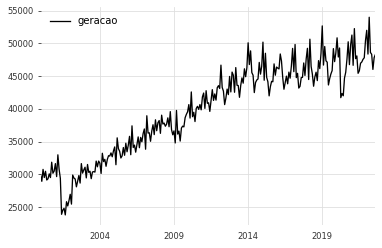

In [3]:
df.plot()

In [4]:
train_df,test_df = df.iloc[:-60],df.iloc[-60:]
transformed_df = train_df.diff().dropna()
train = TimeSeries.from_dataframe(transformed_df)
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(train)
prediction = model.predict(len(test_df), num_samples=1000)

In [20]:
prediction.quantile_df().values.ravel()

array([-1429.52706267,  2418.97834823, -1765.07413184,  1603.75947652,
         467.9669944 , -1739.81136931,  2948.42176562, -1933.50413815,
        -620.08374089, -1202.81911273,   574.11290319,  1334.14673446,
       -1307.98630842,  2382.28603912, -1783.62419095,  1630.89377895,
         516.01057834, -1805.16039434,  3016.60926485, -1956.25943268,
        -599.44825693, -1240.6917609 ,   646.10518707,  1241.93080051,
       -1347.63887536,  2395.92210693, -1758.63034465,  1614.57346209,
         495.93613671, -1699.13531331,  2936.05333343, -1965.09909382,
        -677.07649387, -1244.1555102 ,   553.86136872,  1259.15220291,
       -1373.95028261,  2461.82677965, -1698.88077418,  1573.01977507,
         476.25139597, -1754.366948  ,  2937.70263623, -1930.49134699,
        -632.91943395, -1273.69662303,   628.40944641,  1364.7846041 ,
       -1339.65252186,  2412.09065983, -1792.72529323,  1632.01753918,
         484.76237006, -1780.58683734,  3021.78308287, -1946.30448695,
      

In [ ]:
pred_df = prediction.quantile_df()
real_pred_df = pred_df.cumsum() + train_df.values.ravel()[-1]
final_df = df.copy()
final_df['prediction'] = real_pred_df
final_df.plot()

You are transforming a stochastic TimeSeries (i.e., contains several samples). The resulting DataFrame is a 2D object with all samples on the columns. If this is not the expected behavior consider calling a function adapted to stochastic TimeSeries like quantile_df().


<AxesSubplot:xlabel='time'>

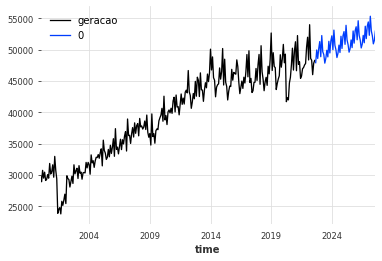

In [138]:
transformed_df = df.diff().dropna()
train = TimeSeries.from_dataframe(transformed_df)
model = TBATS(use_box_cox = True,box_cox_bounds=(0, 10),use_trend = False,use_arma_errors = True)
model.fit(train)
prediction = model.predict(60, num_samples=1000)
pred_df = prediction.quantile_df()
real_pred_df = pred_df.cumsum() + df.values.ravel()[-1]
final_df = pd.concat([df,real_pred_df])
final_df.plot()